In [12]:
from components.HistoryGraph import HistoryGraph
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.svm import SVC
from components.lib import execute_graph
from components.lib import view_dictionary, graphviz_draw
from components.parser.parser import extract_artifact_graph
warnings.filterwarnings('ignore')


<img src="intro.png" alt="image" width="1200" height="auto">

# Hyppo adresses three key limitations of kaggle:

1. Review existing solution (By aggregating the History graph)
2. Modifing existing solutions (Adding operators or using existing ones)
3. Optimization capabilities (Reuse and Equivalence capabilities)




# Collaborative fueled discovery with Hyppo
---

In [15]:
History = HistoryGraph("history")
dataset_id = "HIGGS"

In [ ]:
History.best_metrics_achieved(dataset_id)

In [6]:
History.retrieve_best_pipeline(dataset_id, metric="F1ScoreCalculator")

UnboundLocalError: local variable 'highest_values' referenced before assignment

# Pipeline tuning with Hyppo
---

In [7]:
History.popular_operators(dataset_id)

NetworkXError: The node HIGGS is not in the digraph.

In [8]:
view_dictionary()

,Type,Objective,Implementation
0,Estimator,Classification,TF__MLP
1,Estimator,Classification,TR__MLP
2,Estimator,Classification,GL_LibSVMEstimator
3,Estimator,Classification,PolynomialSVM_TensorFlow
4,Estimator,Classification,SVM_PyTorch
5,Estimator,Classification,SVM_TensorFlow
6,Estimator,Classification,TF_SV
7,Estimator,Ensembles,CustomAverageEnsemble
8,Estimator,Ensembles,CustomStackingEnsemble
9,Estimator,Ensembles,StackingEnsemble


In [11]:
user1_pipe = Pipeline([('scaler', StandardScaler()), ('pca', GPU__PCA(n_components=3)), ('SVC', SVC()), ('F1', F1ScoreCalculator())])
History.execute_and_add(dataset_id, user1_pipe)

NameError: name 'GPU__PCA' is not defined

# Pipeline optimization with Hyppo
---

In [10]:
optimized_pipe = History.optimize_pipeline(dataset_id, user1_pipe)
compute_tasks, load_tasks, request = execute_graph('HIGGS', optimized_pipe)
request

NameError: name 'user1_pipe' is not defined

In [9]:
load_tasks

['HISKStGPPCSKSVSKF12886_score']

In [10]:
compute_tasks

[['F1ScoreCalculator.score']]

# Hyppo Overview
![alt text](HYPPO_v3.png)
---
### 1) Hyppo's Parser

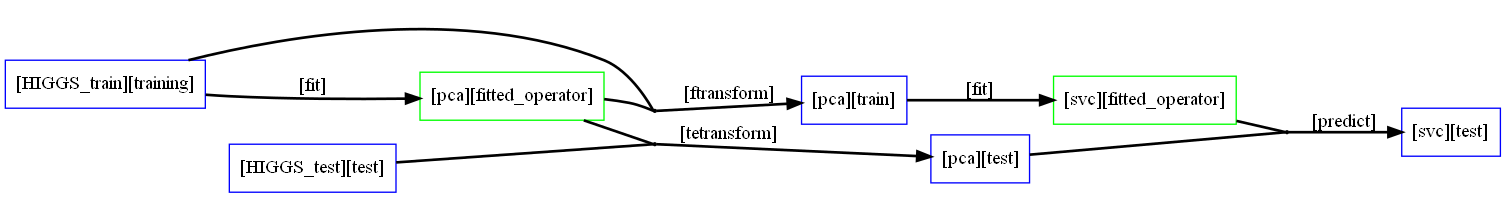

'HISKPCSKSV9009_predict'

In [16]:
from components.lib import interactive_graphviz_draw

user1_pipe = Pipeline([('pca', PCA(n_components=3)), ('svc', SVC())])
artifact_graph, request = extract_artifact_graph(dataset_id, user1_pipe)
graphviz_draw(artifact_graph, type='notebook',  mode='use_alias')
request

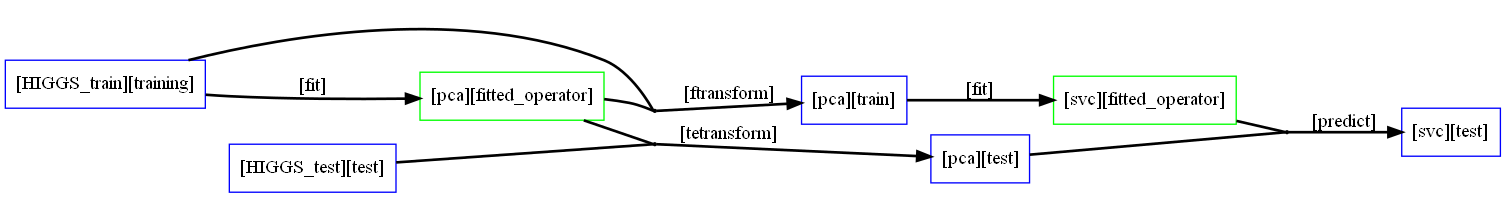

In [10]:
graphviz_draw(artifact_graph, type='notebook',  mode='use_alias')

### 2) Hyppo's History

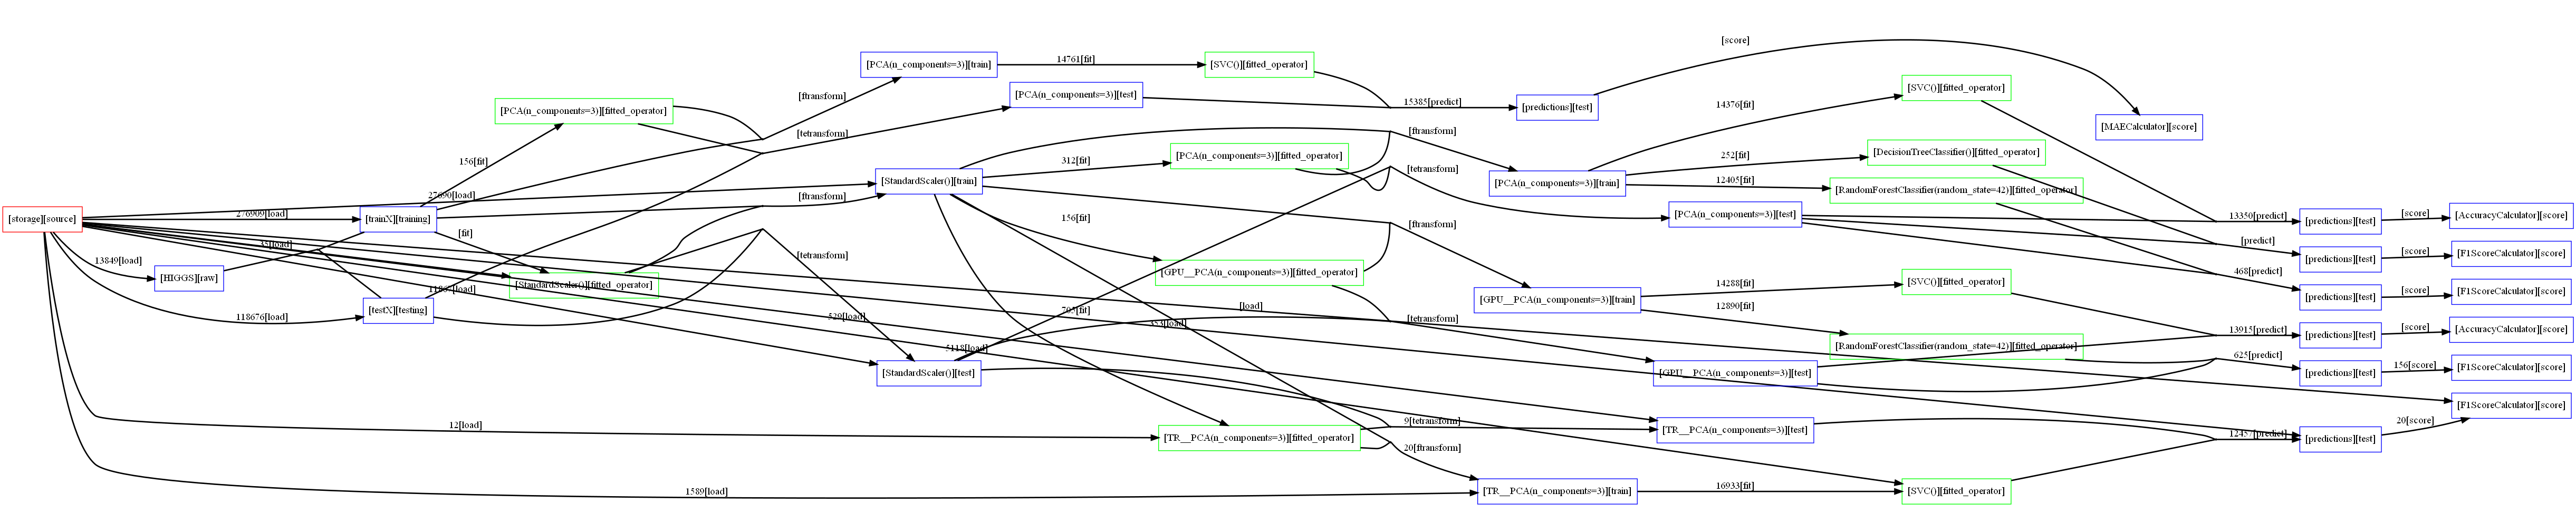

In [11]:
History.visualize(type='notebook', mode='use_alias')

### 3) Augmenter

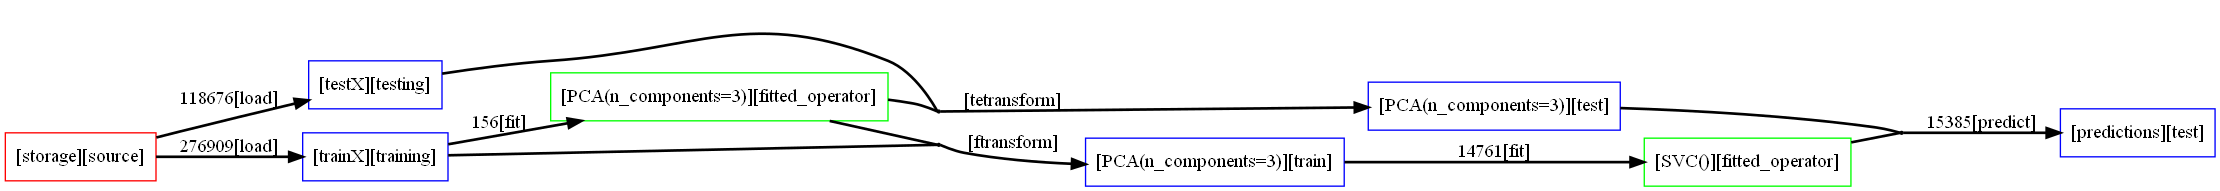

In [14]:
#History.printArtifacts() #HISKStSKPC4529_ftransform
History.visualize_augmented(dataset_id, type='notebook', mode='use_alias', filter_artifact_id="HISKPCSKSV9009_predict", filter = 'retrieve')

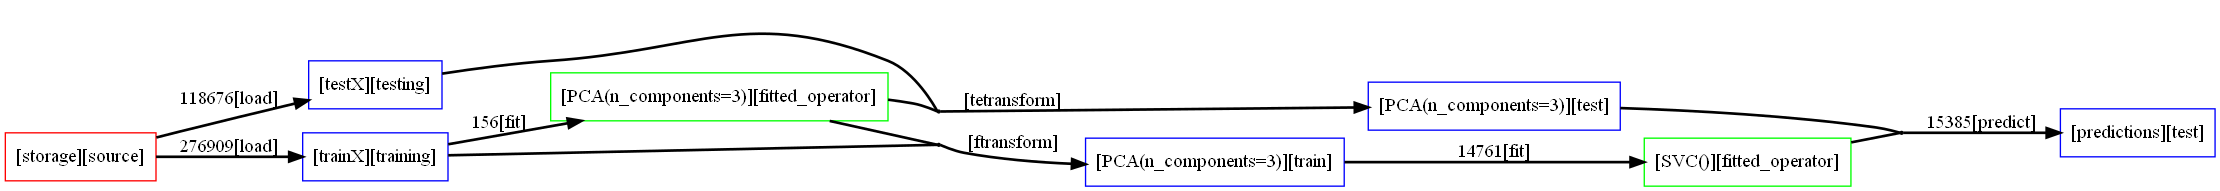

In [15]:
pipe = History.optimal_retrieval_plan(dataset_id,["HISKPCSKSV9009_predict"])
graphviz_draw(pipe[0][1], 'notebook','use_alias')